In [13]:
import matplotlib.pyplot as plt
import numpy as np

class Othello():
    
    
    def __init__(self, turn, board_state, AI):
        """" Initialize the board and state of the game
            Args:
                turn: Whether it is white or black's turn
                board_state: the chararray filled with 'w' for white, 'b' for black,
                and 'e' for empty representing the current board state. 
                AI: whether white or black is the AI
        """
        # If the board state is given at instantiation, set it as the current
        # board state, otherwise instantiate normal starting position
        
        if type(board_state) == np.chararray:
            self.board_state = board_state
        else:
            self.board_state = np.chararray((8,8))
            self.board_state[:] = b'e'
            self.board_state[3][3] = b'b'
            self.board_state[4][3] = b'w'
            self.board_state[3][4] = b'w'
            self.board_state[4][4] = b'b'
        
        # If whose turn is given at instantiation, set it, otherwise default
        # to black
        
        if turn== b'w' or turn== b'b':
            self.turn=turn
        else:
            self.turn = b'b'
        
        # If which person is AI is given, set it, otherwise default
        # to white
        
        if AI == b'w' or AI == b'b':
            self.AI = AI
        else:
            self.AI = b'w'
    
    def do_turn(self, x, y):
        """ Do a single black or white turn
            Args:
                x: x coordinate of the move desired to make
                y: y coordinate of the move desired to make
        """
        # make a tuple move as concatenation of x and y
        move = (x,y)
        
        # get a list of all the valid moves at this board state
        valid_moves = self.get_valid_moves()
        
        # if there are no valid moves, change turn to other person's turn
        
        if not valid_moves:
            print("No moves remaining! Changing to other person's turn :(")
            if self.turn == b'b':
                    self.turn = b'w'
            else:
                    self.turn = b'b'
        else:
            # Check if the move that the person is trying to make is valid

            if move not in valid_moves:
                print("Move not valid!")
            else:
                # If the move is valid, and it's the AI's turn, update the board
                # with the move, and swap the turn to the other person
                if self.turn==self.AI:
                    print("AI Moved.")
                    self.update_board(x, y)
                    print("Your turn!")
                    if self.turn == b'b':
                        self.turn = b'w'
                    else:
                        self.turn = b'b'
                # If the move is valid, and it's NOT the AI's turn, update the board
                # with the new move and switch to AI's turn

                elif self.turn != self.AI:
                    print("You moved.")
                    self.update_board(x, y)
                    print("AI Turn!")

                    # find the best move the computer can make
                    self.turn = self.AI
                    new_x, new_y = self.get_best_move()
                    self.do_turn(new_x, new_y)   
                else:
                    print('Something went seriously wrong to get here.')
        
    
    def update_board(self, x, y):
        """ Update the board with the new move and all of the changes
            that happen as a result of the move
            Args:
                x: x position of the move
                y: y position of the move
        """
        
        # Define the eight vectors you can move from one square
        directions = [(0,1),(0,-1),(1,0),(1,1),(1,-1),(-1,0),(-1,-1),(-1, 1)]
        
        # Figure out whose turn it is
        self.board_state[x][y] = self.turn
        
        # Find out which directions need to be updated to a different colour
        need_to_be_updated = []
        # Iterate through all the directions and check them one at a time
        for d in directions:
            move_found = False
            
            # check_spot is our placeholder for the first spot in the direction
            check_spot = tuple(map(sum, zip((x,y),d)))
            
            # start a separate list to keep adding positions that are the other
            # colour as the one we started out with until we hit the
            # same colour as we started with
            may_need_to_be_updated = [check_spot]
            
            # Check if the spot is out of bounds of the board, then whether
            # the colour of this next square in direction d is of the opposite colour
            if not self.isOOB(*check_spot) and self.board_state[check_spot[0]][check_spot[1]] != self.turn and self.board_state[check_spot[0]][check_spot[1]] != b'e':
                # Keep moving in the direction d, checking if it's OOB and what colour it is
                check_spot = tuple(map(sum, zip((check_spot[0],check_spot[1]),d)))
    
                may_need_to_be_updated.append(check_spot)
                while not self.isOOB(*check_spot) and not move_found:
                    check_spot_colour = self.board_state[check_spot[0]][check_spot[1]]
                    # If the next next or next*3... spot in the direction is the same colour as
                    # whose turn it is, we know that's the end of the move and can update all
                    # of their colours
                    if check_spot_colour == self.turn:
                        move_found = True
                        # get out of the while loop and change the may need to be updated
                        # into definitely need to be updated
                        need_to_be_updated+=may_need_to_be_updated
                    elif check_spot_colour == b'e':
                        # If we find an empty spot, the updating shouldnt have gone 
                        # in that direction, so we just move on to the next direction
                        move_found = True
                    else:
                        # If it's still of the opposite colour, move onto the next spot
                        # in that direction and check for the above conditions all over
                        # again
                        check_spot = tuple(map(sum, zip((check_spot[0],check_spot[1]),d)))
                        may_need_to_be_updated.append(check_spot)

            # If the spot isn't of opposite colour, move on to next direction
            else:
                continue
        for i, j in need_to_be_updated:
            self.board_state[i][j] = self.turn
        
        print(self)
    
    def get_valid_moves(self):
        """ Check current board state and see what moves are valid
        """
        
        # Define the eight vectors you can move from one square
        directions = [(0,1),(0,-1),(1,0),(1,1),(1,-1),(-1,0),(-1,-1),(-1, 1)]
        valid_moves = []
        
        # Set the x_bound and y_Bound to how big the board is
        y_bound = self.board_state.shape[1]
        x_bound = self.board_state.shape[0]
        
        # Iterate through the board finding empty positions and from every
        # empty position, search through the directions for the same colour
        for i in range(0, x_bound):
            for j in range(0, y_bound):
                if self.board_state[i][j] == b'e':
                    # search all directions for each empty spot
                    for d in directions:
                        move_found = False
                        # check_spot is our placeholder for the first spot in the direction
                        check_spot = tuple(map(sum, zip((i,j),d)))
                        
                        # Check if the spot is out of bounds of the board, then whether
                        # the colour of this next square in direction d is of the opposite colour
                        if not self.isOOB(*check_spot) and self.board_state[check_spot[0]][check_spot[1]] != self.turn and self.board_state[check_spot[0]][check_spot[1]] != b'e':
                            check_spot = tuple(map(sum, zip((check_spot[0],check_spot[1]),d)))
                            # Keep moving in the direction d, checking if it's OOB and what colour it is
                            
                            while not self.isOOB(*check_spot) and not move_found:
                                check_spot_colour = self.board_state[check_spot[0]][check_spot[1]]
                                if check_spot_colour == self.turn:
                                    move_found = True
                                    # If the next next or next*3... spot in the direction is the same colour as
                                    # whose turn it is, we know that's the end of the move and can add the move
                                    # to our list of valid moves
                                    valid_moves.append((i,j))
                                elif check_spot_colour == b'e':
                                    move_found = True
                                    # If we find an empty cell before we find our same colour,
                                    # the move is a dead-end and we move to next direction
                                else:
                                    # If none of the above happens, that means we can keep looking
                                    # in that direction until one of the top three things happen
                                    check_spot = tuple(map(sum, zip((check_spot[0],check_spot[1]),d)))
                else:
                    continue
        
        # return all the valid moves we gathered
        return valid_moves
        
    def isOOB(self, x, y):
        """Given an x and y, check if the coordinates are inbounds or out
            Args:
                x: the x coordinate of the move
                y: the y coordinate of the move
        """
        
        y_bound = self.board_state.shape[1]
        x_bound = self.board_state.shape[0]
        if (x < x_bound and y < y_bound and x >= 0 and y >= 0):
            return False
        else:
            return True
            
    
    def get_best_move(self):
        # Filler at the moment, designed to get a random valid move and play
        import random
        valid_moves = self.get_valid_moves()
        move = random.randint(0,len(valid_moves)-1)
        print(valid_moves[move])
        return valid_moves[move]
    
    def __repr__(self):
        to_return = 'Game of Othello with board position:\n {0}'.format(self.board_state)
                    
        return to_return
    def __str__(self):
        """ Print 'Game of Othello' and then display the current board state
            with pyplot"""
        to_return = 'Game of Othello'
        y_bound = self.board_state.shape[1]
        x_bound = self.board_state.shape[0]
        fig = plt.figure()
        ax = fig.gca()
        ax.set_xticks(np.arange(-.5,8.5,1))
        ax.set_yticks(np.arange(-.5,8.5,1))
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_facecolor('green')
        for i in range(0, x_bound):
            for j in range(0, y_bound):
                colour = self.board_state[i][j]
                if colour!=b'e':
                    if colour==b'w':
                        colour = 'white'
                    if colour==b'b':
                        colour = 'black'
                    plt.plot(i, j, marker='o', color=colour, markersize=20)
        plt.grid(True)
        plt.axis([-.5,7.5,-.5,7.5])
        return to_return

In [14]:
o = Othello(turn=b'b', board_state='', AI=b'w')


[(2, 4), (3, 5), (4, 2), (5, 3)]
You moved.
Game of Othello
AI Turn!
(2, 5)
AI Moved.
Game of Othello
Your turn!


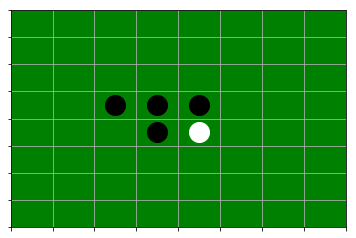

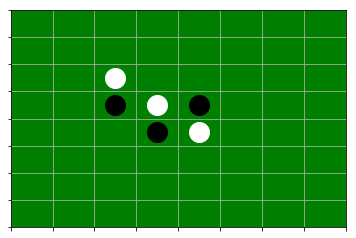

In [15]:
print(o.get_valid_moves())
o.do_turn(2,4)

You moved.
Game of Othello
AI Turn!
(1, 4)
AI Moved.
Game of Othello
Your turn!


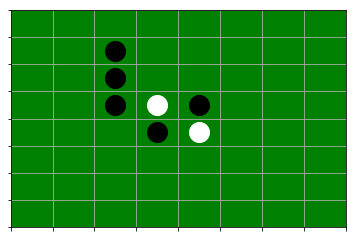

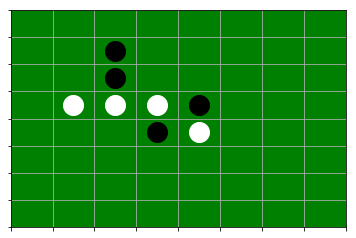

In [16]:
o.do_turn(2,6)

You moved.
Game of Othello
AI Turn!
(5, 4)
AI Moved.
Game of Othello
Your turn!


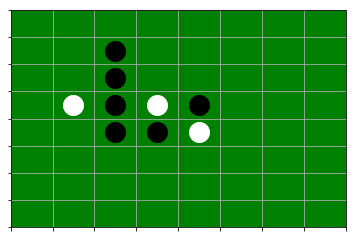

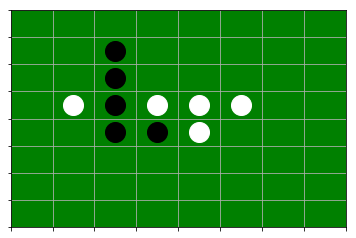

In [17]:
o.do_turn(2,3)

Game of Othello


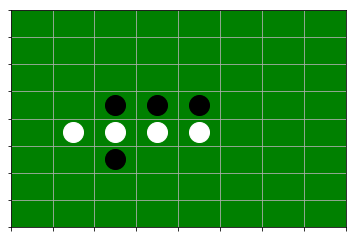

In [12]:
print(o)